## 표준점수 

- 데이터 전처리를 할때 표준점수로 데이터의 scale을 변환할 수 있다.
- 더 적절한 데이터의 형태로 전처리 과정을 거친 데이터를 사용해야 올바른 결과를 도출할 수 있다.

참고 link: https://statistics.laerd.com/statistical-guides/standard-score.php

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

### numpy의 column_stack()메소드 활용
- 데이터 리스트를 세로로 세워서 나란히 연결한다.
- 연결 할 리스트를 tuple로 전달해서 전달 할 값이 바뀌지 않도록 한다.

**note:**
- zip()으로는 리스트를 반환해준다(이전에는 리스트안의 리스트를 사용했다)
- column_stack()은 array(배열)를 반환해준다. (리스트안에 다른 차원의 row들이 있는것이다.) 다차원의 data를 다룰때에는 배열의 데이터 구조로 변환을 해서 데이터를 다루어야한다.

In [2]:
import numpy as np

arr1 = [1,2,3]
arr2 = [4,5,6]
arr_pair = (arr1, arr2)
np.column_stack(arr_pair)

array([[1, 4],
       [2, 5],
       [3, 6]])

In [3]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


### np.ones(), np.zeros(), np.concatenate() 활용

타깃 데이터는 np.ones()와 np.zeros()를 사용해서 1과 0으로만 구성된 데이터 배열을 만들 수 있다.(1이 35개인 배열과 0이 14개인 배열)

왜 넘파이 배열을 사용하는가?

- 데이터가 커질수록 넘파이 배열을 사용해야지 더 빠르게 데이터를 다룰 수 있고, 데이터 분석에 알맞게 최적화되어 있다.

생성된 두 배열은 np.concatenate() 함수에 튜플로 전달하여 연결한다.

In [4]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [5]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### train_test_split()메소드 활용

train_test_split()메소드는 scikit-Learn의 utility tool중 하나이다. 

데이터를 훈련세트와 테스트세트로 나누어준다. (e.g., fish_data, fish_target 2개의 배열을 전달하면 2개씩 총 4개의 배열이 반환된다.)

배열을 비율에 맞게 훈련세트와 테스트 세트로 나누어 준다.(기본적으로 25%를 테스트 세트로 나눈다. (but 퍼센트 변경가능))

**random_state:** 

random state 매개변수는 앞전에 사용했던 np.random.seed()와 같은 역할을 한다. 

**stratify:**

샘플링 편향이 나타나지 않토록 stratify 매개변수에 타킷 데이터를 전달하면 해당 타겟 데이터내의 클래스 비율에 맞게 데이터를 나누어준다. 훈련데이터가 작거나, 샘플개수가 적을때 유용하다.

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, 
                                                                      stratify=fish_target, random_state=42)

print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
train_input.shape, train_target.shape #모델 훈련할때에(fit) 사용 할 데이터 (49개중 36개가 선택되었다)

((36, 2), (36,))

In [8]:
test_input.shape, test_target.shape #모델을 이용 및 평가 시(score) 사용 할 데이터 (49개중 13개가 선택되었다)

((13, 2), (13,))

## 훈련과 테스트 데이터의 전처리

### (1) 잘못된 결과를 주는 case 구현해보기

- k-최근접 이웃을 훈련하고 테스트 데이터로 모델을 평가 한다.
- length = 25, weight = 150인 도미인지 알고있는 샘플 생선을 모델로 예측을 해보면:
    - score() 정확도가 1.0으로 매우 높음에도 불구하고,
    - 결과가 도미가 아닌 빙어로 잘못된 결과가 나오는것이 확인된다.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [10]:
print(kn.predict([[25,150]])) # 결과가  도미(=1)이 아닌, 0(=빙어)이 나왔다. 모델이 틀리게 예측했다.

[0.]


scatterplot으로 샘플 (25, 150)이 어디에 위치하는지 확인해본다.

이 샘플은 오른쪽 위로 뻗어있는 다른 도미데이터에 더 가깝다. 근데 결과는 아래 낮게 깔린 빙어데이터에 가깝다고 판단했다.

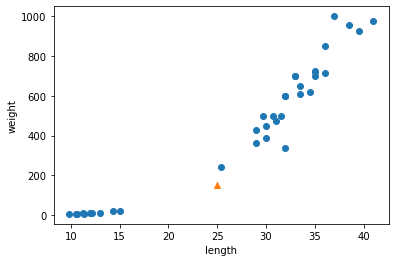

In [11]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1]) #훈련데이터
plt.scatter(25, 150, marker='^') #예측할 샘플(도미)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 이웃이 무엇이였길래 잘못된 결과가 나온것인가?
#### kneighbors() 메소드로 확인한다:

kneighbors(샘플 데이터) : 샘플에서 가장 가까운 이웃들(기본 5개)까지의 거리(distances)와 해당 이웃들의 인덱스를 반환해준다.

In [12]:
distances, indexes = kn.kneighbors([[25, 150]]) 
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


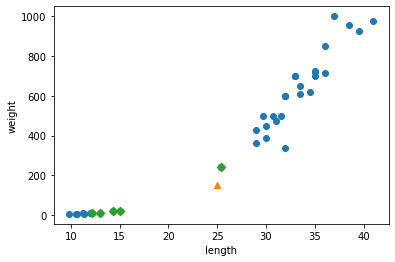

In [13]:
plt.scatter(train_input[: ,0], train_input[: ,1])
plt.scatter(25, 150, marker ='^') #'^'는 세모 모양
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') #'D'는 다이아몬드 모양
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

kneighbors() 함수로 찾은 indexes에 해당하는 train_input data들 5개중, 4개가 빙어이고, 1개만 도미이다.

distances에서 확인되는 거리값은 빙어들보다 도미와 훨씬 더 가깝지만,
kneighbors로 찾은 이웃 5개의 4개가 빙어 이므로 결과가 빙어(=0)이 나왔던것이다.

다음과 같이 실제 값을 확인:

In [14]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [15]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [16]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


(length)x-axis는 scaled in units of 5, (weight)y-axis는 scaled in units of 200. 주어진 데이터에서는 weight의 값의 변동이 length의 값의 변동보다 훨~씬 더 크다. **"데이터(특성) 간의 scale이(범위가) 다르다."**

#### xlim()으로 scatterplot을 다시 x,y동일한 scale로 그려보기:

xlim(0,1000)으로 x축을 y축의 범위와 비슷한 수준으로 지정하여 다시 scatterplot을 그려본다.


**"kNN는 거리기반의 algorithm이다"** 

weight 특성의 영향으로 거의 dominant하며, length 특성은 거의 반영되지 않고있었다.
(Majorly, y값이 결과 (0 or 1)을 결정하는데에 반영됨) 


dominant한 weight특성이 우선 고려되어 weight scale에서 가장 가까운 거리의 이웃을 고려하다보니, length가 도미에 가까운 샘플을 예측해도 빙어라는 결과가 나왔던것이다.

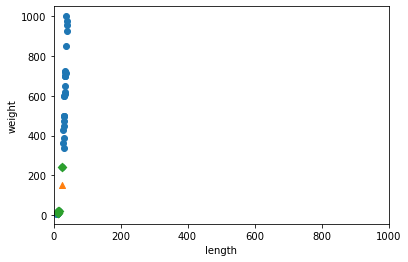

In [15]:
plt.scatter(train_input[: ,0], train_input[: ,1])
plt.scatter(25, 150, marker ='^') #'^'는 세모 모양
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') #'D'는 다이아몬드 모양
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

### (2) 전처리된 데이터로 정확한 결과를 주는 case 구현해보기

### 표준점수

#### 표준점수를 사용해서 각 특성의 scale 차이를 고려하도록 데이터를 전처리해야한다. 

- 데이터 특성의 스케일이 다를때 가장 널리 사용되는 전처리 작업- 표준 점수(standard z score)
  
  - [표준점수] = 원본 데이터에서 평균을 빼고 표준편차로 나눈 값 (numpy를 사용해서 데이터 배열에 broadcasting해서 표준점수를 계산한다)
  
  
- Z점수라고도 부르는 표준점수는 각각의 데이터 값이 동일한 기준에서 몇배의 표준편차만큼 떨어져 있는지를 나타낸다. 이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할 수 있다.

In [17]:
#column별로 평균을 구하기위해 axis=0 (아래로 내려가는 방향)
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

print(mean) #평균
print(std) #표준편차

[ 27.29722222 454.09722222]
[  9.98244253 323.29893931]


In [18]:
#boradcasting
train_scaled = (train_input - mean)/std
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

### 전처리된 데이터로 모델을 훈련

표준점수로 변환한 train_scaled와 샘플 생선(length=20, weight=150)로 산점도를 그린다.

샘플도 표준 점수로 변환하여 사용한다.

In [19]:
#샘플도 표준점수로 계산
sample = ([25, 150] - mean)/std
sample

array([-0.23012627, -0.94060693])

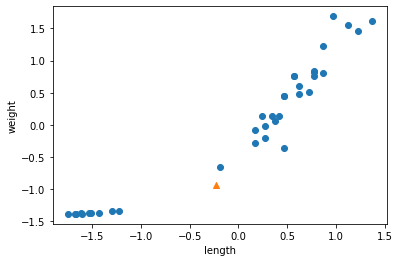

In [20]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(sample[0], sample[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
#표준점수로 변환한 데이터로 k-최근접 이웃 모델을 다시 훈련한다.
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [22]:
#테스트 세트도 표준점수로 변환한다.
test_scaled = (test_input - mean)/std

In [23]:
#모델의 정확도 평가 
kn.score(test_scaled, test_target)

1.0

In [24]:
#샘플을 사용해서 모델을 예측한다.
print(kn.predict([sample])) #도미로 예측된다 : CORRECT!

[1.]


### kneighbors()

kneighbors()로 확인하면 표준점수로 전처리된 데이터를 사용한 경우, 이웃들이 도미쪽에 있고, 샘플의 예측 결과는 정확하게 도미가 나오는것을 확인 할 수 있다.

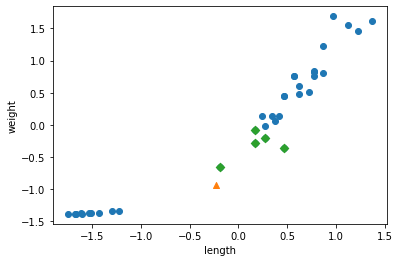

In [25]:
#kneighbors()로 이웃을 구하여 산점도로 확인한다.
distances, indexes = kn.kneighbors([sample])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(sample[0], sample[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [26]:
train_scaled[indexes] #diamond shaped dots

array([[[-0.19005591, -0.65604058],
        [ 0.17057727, -0.28177396],
        [ 0.27075315, -0.19825992],
        [ 0.47110492, -0.35291555],
        [ 0.17057727, -0.07453542]]])

In [27]:
train_target[indexes] #kneighbor로 선정된 이웃들이 도미이다.

array([[1., 1., 1., 1., 1.]])